<a href="https://colab.research.google.com/github/Chabs4/ai-science-training-series/blob/main/2024_10_30_Beauty_session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beauty Home work 1

# Mini Batch Training

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time


In [87]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv


In [88]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [89]:
def model(x,m,b):
   """
   Args:
     x:
     m:
     b:
   Returns:
   """
   return m * x + b

In [90]:
def loss(x,y,m,b):
   """
   Args:
     x:
     y:
     m:
     b:
   Returns:
   """
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [91]:
def updated_m(x,y,m,b,learning_rate):
   """
   Args:
     x:
     y:
     m:
     b:
     learning_rate:
   Returns:
   """
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   """
   Args:
     x:
     y:
     m:
     b:
     learning_rate:
   Returns:
   """
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [92]:
def batch_sample(file_name, batch_size=60, file_type='csv', random_seed=None):
    """
    Load randomly sampled in smaller batches from a CSV file.

       Args:
        file_name : str
        Path to the CSV file
    batch_size : int
        Number of rows to sample
    file_type : str
        Type of file ('csv')
    random_seed : int, optional
        Random seed for reproducibility
    Returns:
    pandas.DataFrame
        Randomly sampled batch of data
    """
    # Set random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    if file_type.lower() == 'csv':
        # Count total rows efficiently
        total_rows = sum(1 for _ in open(file_name)) - 1  # Subtract 1 for header

        # Generate random row indices
        selected_rows = sorted(np.random.choice(
            range(1, total_rows + 1),
            size=batch_size,
            replace=False
        ))

        # Read only the selected rows
        return pd.read_csv(
            file_name,
            skiprows=lambda x: x not in [0] + selected_rows  # Keep header (0) and selected rows
        )




[511]  dy_i = 343417786130702540566076795522299036027466400399360.00 * x + -829141529040889459257357733599025746522400901864357888.00     previously calculated: y_i = 64.40 * x + 60322.29    loss: 152363816542483361759397642689632239012770191615868476832892188905748510157742397481733704089662417820188672.000000


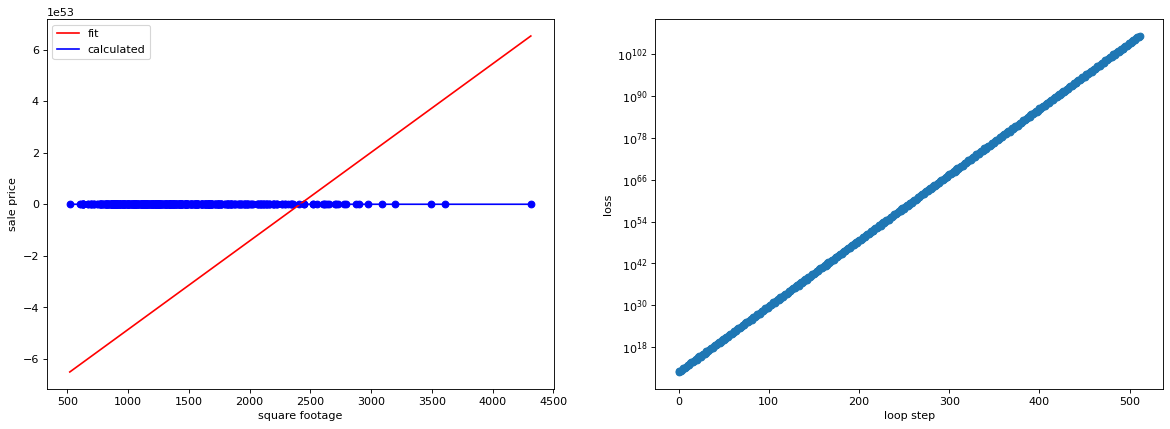

In [99]:
m = 5.
b = 1000.

# creating the batch_sample
np.random.seed(42)  # Set seed for reproducibility
data_batch = batch_sample('slimmed_realestate_data.csv', batch_size=64*8)
print(f"Loaded {len(data_batch)} rows")

# set a learning rate for each parameter
learning_rate_m = 1e-7*8
learning_rate_b = 1e-1*8
# use these to plot our progress over time
loss_history = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()

# we run our loop N times
loop_N = len(data_batch)
for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

   # close/delete previous plots
   plt.close('all')

   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

# Learning curves for different batch sizes: 30, 64, and 100.

batch size = 30

dy_i = 70.46 * x + 53537.15 previously calculated: y_i = 64.40 * x + 60322.29 loss: 1084889817.781152
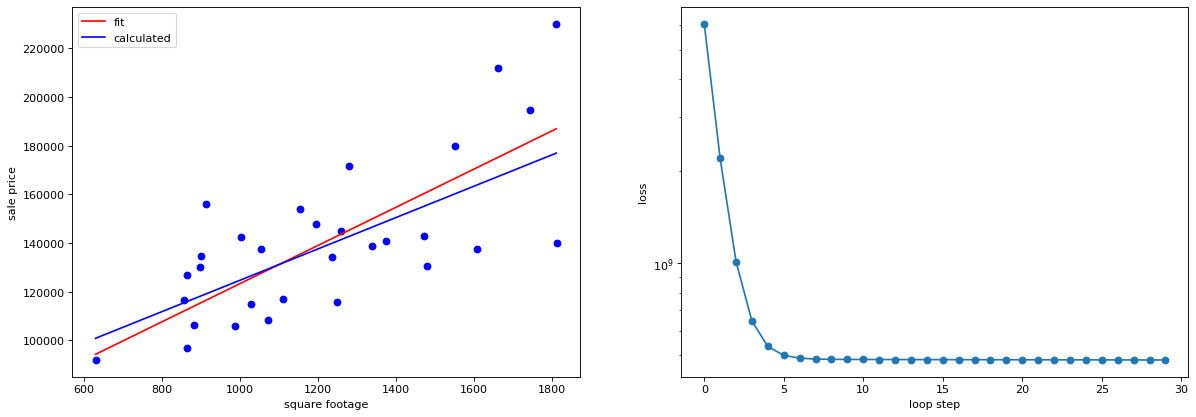

batch size = 64

 dy_i = 71.54 * x + 49818.66     previously calculated: y_i = 64.40 * x + 60322.29    loss: 1064061559.562302

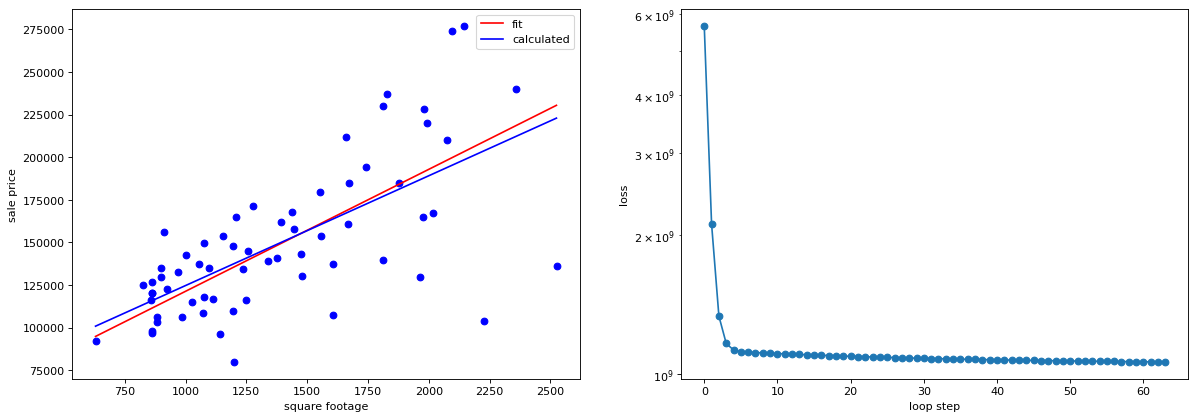

batch size = 100

dy_i = 70.46 * x + 53537.15
previously calculated: y_i = 64.40 * x + 60322.29    loss: 1084889817.781152

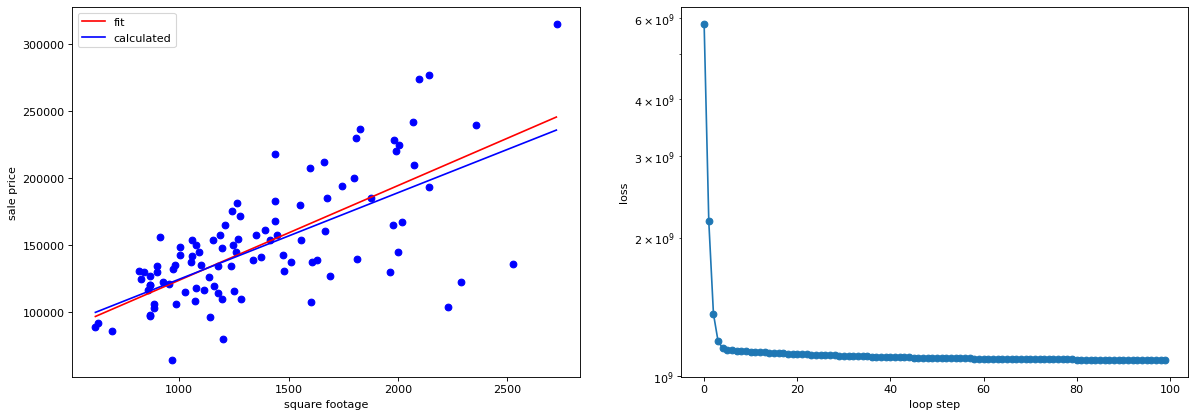

# Bonus

(64, 1e-7, 1e-1)*2
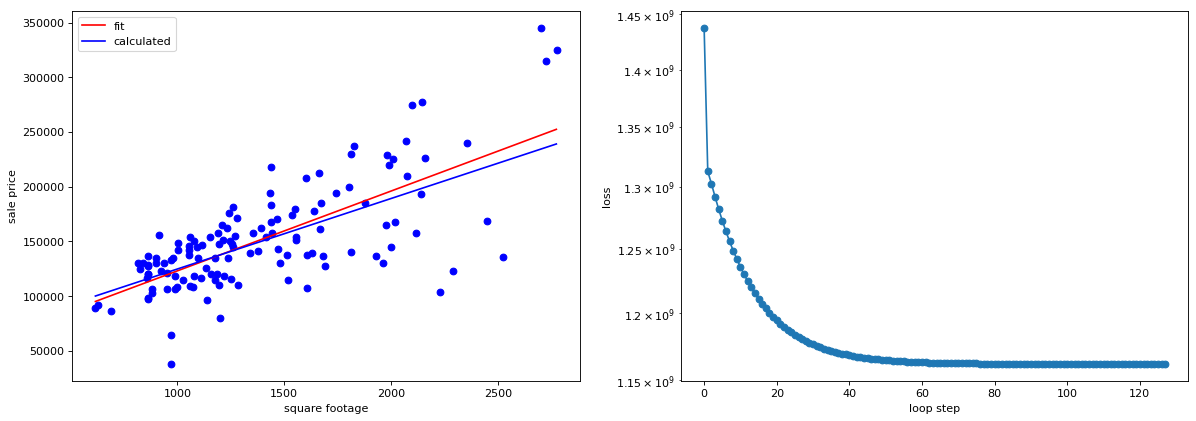

(64, 1e-7, 1e-1)*4
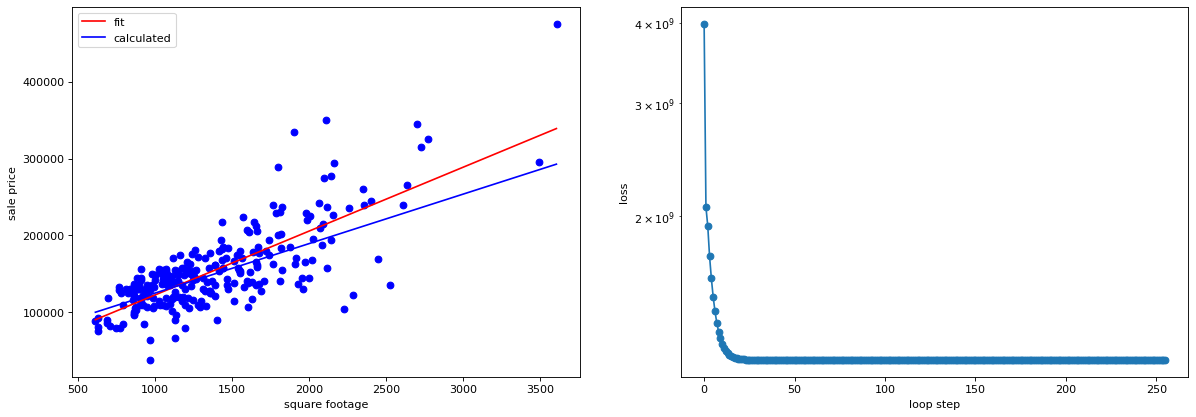

(64, 1e-7, 1e-1)*8

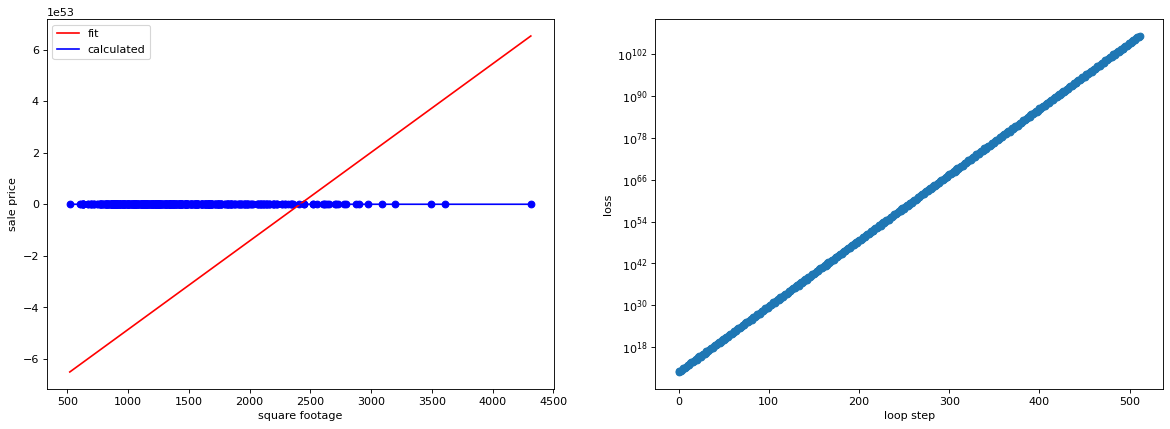